# Multi Layer Feedforward Neural Network:

In [69]:
import numpy as np
np.random.seed(1) #Affects the numpy.random function -> inital seed for debugging
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from help_functions import dataset_regression

In [70]:
def print_costs(E, i):
    costs =[]
    if i % 100 == 0:
        costs.append(E)
        # Print the cost every 100 training examples
        print ("Cost after iteration %i: %f" %(i, E))
    return costs

## Aufbau des MLNN:
Zuerst laden wir den Datensatz. Wir können die Funktion `Dataset Regression` verwenden.

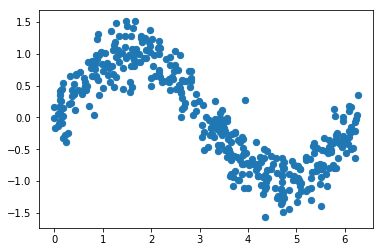

In [71]:
# Load the dataset
n_samples = 400 # number of samples 
x1, y = dataset_regression(n_samples)
plt.scatter(x1[:,0], y[:,0] , s=40, cmap=plt.cm.Spectral)
plt.show()

Zu Beginn versuchen wir eine lineare Abbildung zwischen Eingang $ x_1 $ und Ausgang $ y $ zuerstellen. Abbildung 1 zeigt dieses Netzwerk.
Bias ist das w0 Gewicht und beträgt immer 1 -> "Eine spezielle Behandlung des Schwellenwerts kann so entfallen und vereinfacht die Behandlung in den Lernregeln."

<img src="img/NNKit1.png" style="width:350px;height:200;">

Zuerst werden **die Gewichte initalisiert**.
> **Hinweis:** Gewichte sollen verschieden voneinander, zufällig, gleichverteilt und klein sein. Verwenden Sie `W = 0.01 * np.random.randn(n_x,n_y)` wobei `n_x` die Anzahl von Input-Neuronen + 1 Bias-Neuron und `n_y` die Anzahl von Output-Neuronen ist. 

Die Beziehung zwischen Eingang und Ausgang ist linear
$$ y_{pred} = \sum_i w_i*x_i  $$  

Implementieren Sie nun den linearen Klassifikator anhand gegebener Formel.

[[-0.00300976]
 [ 0.00807456]]


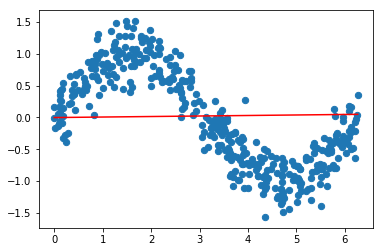

In [72]:
n_x = 2 #Input
n_y = 1 #Output


#TODO: 
# Weights list
W = 0.01 * np.random.randn(n_x, n_y)
print(W)
# Bias
x0 = np.full((n_samples,1),1)

# Concatenate the bias and the input in one vector x 
X= np.concatenate([x0,x1], axis=1)

# Output of the network
y_pred = np.dot(X,W) # (400,2) * (2,1) = (400,1) 

#Plotted Result
plt.scatter(x1[:,0], y[:,0] , s=40, cmap=plt.cm.Spectral)
plt.plot(x1[:,0],y_pred[:,0],'red')
plt.show()

Ihr erstes Modell passt möglicherweise nicht sehr gut zu den Daten. Suchen Sie nach einer guten Lösung für die optimalen Gewichte, um ein besseres Modell zu erhalten. Hierzu verwenden Sie das aus der Vorlesung bekannte Verfahren **Backpropagation**. Betrachten Sie folgende Fehlerfunktion:
$$E(W) = \frac{1}{2} \sum (y - y_{pred})^2$$
wobei,
* $y$ ist  der richtige Ausgang (Target) und
* $y_{pred}$ ist der Ausgang des Modells (Prediction)

In [73]:
# TODO: calculate the loss function
E = 0.5 * np.sum(np.square(y-y_pred))
print('The Loss function is equal: ', E)

The Loss function is equal:  114.977697004


Versuchen wir nun, diesen Fehler zu minimieren und die Gewichte anzupassen. Diese Änderung sollte nach dem Gradienten erfolgen.
$$\Delta w_{i} = -\eta \frac{\partial E}{\partial w_{i}}$$
wobei
* $\eta$ ist Lernrate
* $ i \in {0,1} $
$$\begin{split}
E(W)&  = \frac{1}{2} \sum (y - y_{pred})^2\\
 & = \frac{1}{2} \sum (y - \sum_i w_ix_i)^2
\end{split}$$

**Hinweis** Sie müssen die partielle Ableitung von  $ w_i $ betrachten.

In [74]:
# Learning rate (can be changed freely)
eta = 0.001

# TODO: Gradient Descent
dW = np.dot(X.transpose(),(y-y_pred))

print('The change in weights:')
print('dw0 = ', dW[0,0])
print('dw1 = ', dW[1,0])

The change in weights:
dw0 =  -26.2390150558
dw1 =  -488.817971244


Aktualisieren Sie nun die Gewichte bzgl ihrer Änderung wie aus der Vorlesung bekannt.

In [75]:
# TODO: Update the weights
W = W + dW
print(W)

[[ -26.24202482]
 [-488.80989669]]


Zur Übersichtlichkeit fassen Sie nun alle obigen Komponenten in einer Methode ein. Zur Veranschaulichung haben wir nun noch die Array-Variable costs.

In [80]:
def LinearModel(x1,y, n_Iteration = 100000):
    # step 0: Initialize the weights
    n_x = 2 #Input
    n_y = 1 #Output
    
    W = 0.01 * np.random.randn(n_x, n_y)
    costs = []
    
    # step1: define the bias and Conatenate the bias and the input x1 in one vector X 
    x0 = np.full((len(x1),1),1)
    X= np.concatenate([x0,x1], axis=1)
    
    for i in range(n_Iteration):
         
        # step2: Calculate scalar as output
        y_pred = np.matrix(X) * np.matrix(W) #Does the same as "dot"
        # step3: TODO: calculate the loss function
        E = 0.5 * np.sum(np.square(y-y_pred))
        # Record the costs and record costs
        costs = print_costs(E, i)
        eta = 0.00001
        # step4 : Gradient Descent        
        dW = np.dot(X.transpose(),(y-y_pred))
        dW = np.multiply(dW, eta)
        # step5 : Update the weights
        W = W + dW
    return W

Cost after iteration 0: 115.232914
Cost after iteration 100: 89.076216
Cost after iteration 200: 83.014487
Cost after iteration 300: 77.998877
Cost after iteration 400: 73.848758
Cost after iteration 500: 70.414781
Cost after iteration 600: 67.573369
Cost after iteration 700: 65.222269
Cost after iteration 800: 63.276874
Cost after iteration 900: 61.667175


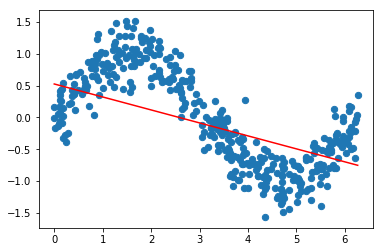

In [81]:
# Don't change the following code only run it
W = LinearModel(x1,y, n_Iteration = 1000)

x0 = np.ones((x1.shape[0],1))
X= np.concatenate([x0,x1],axis=1)
# Make a prediction 
y_pred= np.dot(X,W)

# Plot the result
plt.scatter(x1[:,0], y[:,0] , s=40, cmap=plt.cm.Spectral)
plt.plot(x1[:,0],y_pred[:,0],'red')
plt.show()


### Activation Function:
Im letzten Beispiel haben Sie feststellen können, dass ein lineares Modell nicht ausreicht, um die Daten zu beschreiben. Im nächsten Schritt passen Sie die Aktivierungsfunktion an, die diesmal Nicht-Linear sein soll. Abbildung 2 zeigt dieses Netzwerk.

<img src="img/NNKit2-2.png" style="width:350px;height:200;">
<caption><center> <u> **Abbildung 2** </u>: **Nichtlineares Modell mit einer versteckten Schicht**<br> </center></caption>

Eine mögliche Aktivierungsfunktion ist die **Sigmoid** Funktion.

$$\sigma = f(x) = \frac{1}{1+e^{x}}$$

Implementieren Sie nun die neue Aktivierungsfunktion und dessen Ableitung.

In [82]:
def sigmoid(x):
    # Sigmoid Function
    s = 1 / (1+numpy.exp(x))
    
    return s

In [84]:
def sigmoid_derivative(x):
    # Sigmoid Derivative
    sd = sigmoid(x)*(1-sigmoid(x))
    return sd

### Initialisierung der Parameter
> **Hinweis:** Gewichte sollen verschieden voneinander, zufällig, gleichverteilt und klein sein. Sie können Befehl `W = 0.01 * np.random.randn(n_x,n_y)` wobei `n_x` ist die Anzahl von Eingang + 1 (wegen Bias) und `n_y` ist die Anzahl von Ausgang. 

In [ ]:
def parameter_initialize(n_x= 1, n_h = 1, n_y=1):
    # TODO : initialize the weights
    # Input layer : W1 = [w01 w11]
    W1 = 
    # Hidden layer : W2 = [w02 w12]
    W2 = 
    # save these parameters to use them again in Backward Propagation 
    parameters= {"W1": W1,
                 "W2": W2}
    return parameters

### Forward Propagation:
Der Eingang der versteckten Schicht ist
$$ \begin{split} Z &=  \sum_{i=0}^1 w_{i,1}*x_{i,1} \\
                          & = \begin{bmatrix}x_{0} & x_{1} \end{bmatrix} \begin{bmatrix} w_{0,1} \\ w_{1,1} \end{bmatrix} \\
                          & = X^T W_1 
                          \end{split}$$

wobei
* $x_0 = 1$

Der Ausgang der versteckten Schicht ist
$$ a_1 = \text{sigmoid}(Z) $$ 

Der Ausgang des Modells ist
$$ \begin{split} y_{pred} & =   \sum_{i=0}^1 w_{i,2}a_{i}\\  
                          & = \begin{bmatrix}a_{0} & a_{1} \end{bmatrix} \begin{bmatrix} w_{0,2} \\ w_{1,2} \end{bmatrix} \\
                          & = A^T W_2
                          \end{split}$$

wobei
* $a_0 = 1$

In [ ]:
def forward_propagation(X,parameters):
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    # TODO: Implement Forward Propagation to calculate ypred
    
    #Insert Z and a1
    
    # concatenate a0 and a1 in one vector 
    
    #insert a0 and Vector A=[a0,a1]
    
    # TODO: the Output of your Model
    ypred =
    
    # save  some parameters to use them again in Backward Propagation

    Memory = {"Z": Z,
              "A" : A,
              "ypred": ypred}
    
    return ypred, Memory

### Fehlerfunktion:
Der Fehler ist definiert durch
$$ F = y - y_{pred} $$

und die Fehlerfunktion
$$E(W) = \frac{1}{2} \sum (y - y_{pred})^2$$

In [ ]:
def compute_cost(Memory, y):
    ypred = Memory["ypred"]
    # TODO: Compute the cost like above
    
    E = 0
    
    E = np.squeeze(E)     # makes sure cost is the dimension we expect.  
    
    return E

### Backward Propagation:

<img src="img/backpropagation.gif" style="width:500px;height:300;">
<caption><center> <u> **Abbildung 2** </u>: **Nichtlineares Modell mit einer versteckten Schicht**<br> </center></caption>


Die Fehlerfunktion kann durch die Gewichtsänderung minimiert werden
$$E(W) = \frac{1}{2} \sum (y - A^T W_2)^2$$

Diese Änderung soll nach dem Gradienten sein.

Die partielle Ableitung der Fehlerfunktion nach Gewichtungen in der versteckten Schicht $ w_{i,2} $
$$ dW_2 = \begin{bmatrix} dw_{0,2} \\ dw_{1,2} \end{bmatrix} = \begin{bmatrix} \frac{\partial E(W)}{\partial w_{0,2}}\\ \frac{\partial E(W)}{\partial w_{1,2}} \end{bmatrix}  = \begin{bmatrix} -Fa_{0}\\ -Fa_{1} \end{bmatrix} = -A^TF$$


Die partielle Ableitung der Fehlerfunktion nach Ausgang der versteckten Schicht ist  $a_{1} $
$$ dE =\frac{\partial E}{\partial a_{1}}  = -w_{1,2}F  $$


Wie bereits erwähnt, ist die **Sigmoid-Funktion** $\sigma $ als die Aktivierungsfunktion verwendet wurde. Die partielle Ableitungen des Ausgangs der versteckten Schicht nach den Ausgang der Eingang Schicht $Z $
$$\begin{split}
da_1 = \frac{\partial a_1}{\partial Z} & = \sigma( Z)(1-\sigma( Z))\\
& = a_1(1-a_1)
\end{split}$$

Die partielle Ableitungen des Ausgang der Eingangsschicht $Z$ nach  den Gewichtungen in der Eingangsschicht
$$ dZ = \begin{bmatrix} z_0 \\  z_1  \end{bmatrix} = \begin{bmatrix} \frac{\partial Z}{\partial w_{0,1}} \\  \frac{\partial Z}{\partial w_{1,1}} \end{bmatrix} = \begin{bmatrix}  x_0 \\ x_1 \end{bmatrix}$$



Die partiellen Ableitungen der Fehlerfunktion nach den Gewichtungen in der Eingabeschicht können nun mit der **Kettenregel** berechnet werden **
$$ dW_1 = \begin{bmatrix} dw_{0,1} \\ dw_{1,1} \end{bmatrix} = \begin{bmatrix} \frac{\partial E}{\partial w_{0,1}} \\ \frac{\partial E}{\partial w_{1,1}} \end{bmatrix} = dE  da_1 dZ
$$

In [ ]:
def backward_propagation(parameters, Memory, X, y):

    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Second, retrieve A1 and ypred from the dictionary "Memory".    
    Z = Memory["Z"]
    A = Memory["A"]
    ypred = Memory["ypred"]

    
    # Backward propagation: calculate dW2 and dW1  
    F= 
    dW2= 
    dE = 
    
    da1 = 
    dZ = 
    dW1= 
    ### END CODE HERE ###
    
    # save the gradient to use them to update the weights
    grads = {"dW1": dW1,
             "dW2": dW2}
    
    return grads

## Hauptprogramm
Wir haben bereits alle notwendigen Funktionen implementiert, um unser Modell zu erstellen und zu trainieren. Nun wollen wir  all diese Funktionen in einem Hauptprogramm durchführen. 
* Schritt 1: Definieren Sie die Trainingsdaten
* Schritt 2: Initialisieren Sie die Gewichte
* Schritt 3: Trainieren Sie Ihre Modell
   * Forward Propagation 
   * Berechnen der Fehlerfunktion
   * Backward Propagation
   * Aktualisierung der Gewichte

In [ ]:
costs= []
x0 = np.ones((x1.shape[0],1))
X= np.concatenate([x0,x1],axis=1)

# TODO:
# Initialize Parameters W1 and W2
#

for i in range(4000):
    #TODO:
    #Calculate Forward Propagation:
    #
    
    #Compute Loss Function
    #
    
    #print and save costs
    costs = print_costs(E)
            
        
    # TODO:
    # Calculate Backward Propagation and the Gradients of W1 and W2
    
    
    
    # TODO:
    # Update the weights with a good learning rate
    eta = 0.0
    W1 = 0
    W2 = 0
    
    parameters= {"W1": W1,
                 "W2": W2}

In [ ]:
# Plot the result
y_pred = Memory["ypred"]
plt.scatter(x1[:,0], y[:,0] , s=40, cmap=plt.cm.Spectral)
plt.plot(x1[:,0],y_pred[:,0],'red')
plt.show()